In [9]:
import pandas as pd

def preprocess_dataset(df):
    # 1. Time of Day
    df['hour_of_day'] = df['step'] % 24

    # 2. Day of the Week (assuming 'step' represents days)
    df['day_of_week'] = df['step'] % 7

    # 3. Transaction Frequency
    transaction_frequency = df.groupby('nameOrig').size().reset_index(name='transaction_frequency')
    df = pd.merge(df, transaction_frequency, on='nameOrig', how='left')

    # 4. Transaction Amount Category
    bins = [0, 1000, 10000, 100000, float('inf')]
    labels = ['small', 'medium', 'large', 'very large']
    df['amount_category'] = pd.cut(df['amount'], bins=bins, labels=labels)

    # 5. Transaction Origin Type
    df['origin_type'] = df['nameOrig'].apply(lambda x: 'individual' if x.startswith('C') else 'business')

    # 6. Transaction Destination Type
    df['dest_type'] = df['nameDest'].apply(lambda x: 'individual' if x.startswith('C') else 'business')

    # 7. Transaction Duration
    df['transaction_duration'] = df.groupby('nameOrig')['step'].diff().fillna(0)

    # 8. Transaction Velocity
    df['transaction_velocity'] = df['amount'] / df['transaction_duration']

    # 9. Transaction Amount Relative to Balance
    df['amount_relative_to_balance'] = df['amount'] / df['oldbalanceOrg']

    # 10. Flagged Fraud Reason (if available, add appropriate column)
    df['flagged_fraud_reason'] = ''

    # Limit 'step' values to 9
    df.loc[df['step'] > 9, 'step'] = 9

    return df

def process_dataset(file_path):
    try:
        # Read the dataset from Excel
        df = pd.read_excel(file_path)

        # Preprocess the dataset
        df_processed = preprocess_dataset(df)

        # Save the processed dataset to a new Excel file
        output_file_path = file_path.replace('.xlsx', '_processed.xlsx')
        df_processed.to_excel(output_file_path, index=False)

        print(f"Processed dataset saved to {output_file_path}")
    except Exception as e:
        print("An error occurred:", e)

# Specify the path to your Excel dataset file
dataset_path = r'C:\Users\kunta\Downloads\50K.xlsx'
# Call the function to process the dataset
process_dataset(dataset_path)

An error occurred: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).


Here are the new features that are added along with the formulas used to derive them:

hour_of_day: The hour of the day when the transaction occurred.
Formula: hour_of_day = step % 24
day_of_week: The day of the week when the transaction occurred.
Formula: day_of_week = step % 7
transaction_frequency: Frequency of transactions for each 'nameOrig'.
Formula: Count of transactions grouped by 'nameOrig'.
amount_category: Categorization of transaction amount.
Formula: Transaction amount is categorized into bins ('small', 'medium', 'large', 'very large').
origin_type: Type of origin account ('individual' or 'business').
Formula: If 'nameOrig' starts with 'C', it's categorized as 'individual'; otherwise, it's categorized as 'business'.
dest_type: Type of destination account ('individual' or 'business').
Formula: If 'nameDest' starts with 'C', it's categorized as 'individual'; otherwise, it's categorized as 'business'.
transaction_duration: Duration of the transaction for each 'nameOrig'.
Formula: Difference in 'step' values for each 'nameOrig'.
transaction_velocity: Velocity of the transaction.
Formula: Transaction amount divided by transaction duration.
amount_relative_to_balance: Amount relative to the balance before the transaction.
Formula: Transaction amount divided by the original balance before the transaction.
flagged_fraud_reason: Reason for flagging the transaction as fraudulent (empty column).
No specific formula provided; this column is left empty for potential future use.
These new features provide additional insights into the transactions and account types, making the dataset more informative for further analysis.








In [10]:
import pandas as pd

def preprocess_dataset(df):
    # 1. Time of Day
    df['hour_of_day'] = df['step'] % 24

    # 2. Day of the Week (assuming 'step' represents days)
    df['day_of_week'] = df['step'] % 7

    # 3. Transaction Frequency
    transaction_frequency = df.groupby('nameOrig').size().reset_index(name='transaction_frequency')
    df = pd.merge(df, transaction_frequency, on='nameOrig', how='left')

    # 4. Transaction Amount Category
    bins = [0, 1000, 10000, 100000, float('inf')]
    labels = ['small', 'medium', 'large', 'very large']
    df['amount_category'] = pd.cut(df['amount'], bins=bins, labels=labels)

    # 5. Transaction Origin Type
    df['origin_type'] = df['nameOrig'].apply(lambda x: 'individual' if x.startswith('C') else 'business')

    # 6. Transaction Destination Type
    df['dest_type'] = df['nameDest'].apply(lambda x: 'individual' if x.startswith('C') else 'business')

    # 7. Transaction Duration
    df['transaction_duration'] = df.groupby('nameOrig')['step'].diff().fillna(0)

    # 8. Transaction Velocity
    df['transaction_velocity'] = df['amount'] / df['transaction_duration']

    # 9. Transaction Amount Relative to Balance
    df['amount_relative_to_balance'] = df['amount'] / df['oldbalanceOrg']

    # 10. Flagged Fraud Reason (if available, add appropriate column)
    df['flagged_fraud_reason'] = ''

    # Limit 'step' values to 9
    df.loc[df['step'] > 9, 'step'] = 9

    return df

def process_dataset(file_path):
    try:
        # Read the dataset from Excel
        df = pd.read_excel(file_path)

        # Preprocess the dataset
        df_processed = preprocess_dataset(df)

        # Save the processed dataset to a new Excel file
        output_file_path = file_path.replace('.xlsx', '_processed.xlsx')
        df_processed.to_excel(output_file_path, index=False)

        print(f"Processed dataset saved to {output_file_path}")
    except Exception as e:
        print("An error occurred:", e)

# Specify the path to your Excel dataset file
dataset_path = r'C:\Users\kunta\Downloads\50K.xlsx'
# Call the function to process the dataset
process_dataset(dataset_path)

An error occurred: Pandas requires version '3.1.0' or newer of 'openpyxl' (version '3.0.10' currently installed).


In [6]:
data = pd.read_excel(r"C:\Users\kunta\Downloads\50K_processed.xlsx", engine='openpyxl')


In [7]:
# Basic statistics
print(data.describe())


               step        amount  oldbalanceOrg  newbalanceOrig  \
count  49999.000000  4.999900e+04   4.999900e+04    4.999900e+04   
mean       7.453769  1.562676e+05   7.332995e+05    7.472655e+05   
std        2.056645  3.243974e+05   2.202426e+06    2.239993e+06   
min        1.000000  6.300000e-01   0.000000e+00    0.000000e+00   
25%        7.000000  7.735090e+03   0.000000e+00    0.000000e+00   
50%        8.000000  3.341600e+04   1.703000e+04    0.000000e+00   
75%        9.000000  1.878404e+05   1.331625e+05    1.438245e+05   
max        9.000000  1.000000e+07   2.854724e+07    2.861740e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  \
count    4.999900e+04    4.999900e+04  49999.000000         49999.0   
mean     8.444840e+05    1.164423e+06      0.002000             0.0   
std      2.433409e+06    2.915227e+06      0.044678             0.0   
min      0.000000e+00    0.000000e+00      0.000000             0.0   
25%      0.000000e+00    0.00000

C:\Users\kunta\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\kunta\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [8]:
# Data types and missing values
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   step                        49999 non-null  int64  
 1   type                        49999 non-null  object 
 2   amount                      49999 non-null  float64
 3   nameOrig                    49999 non-null  object 
 4   oldbalanceOrg               49999 non-null  float64
 5   newbalanceOrig              49999 non-null  float64
 6   nameDest                    49999 non-null  object 
 7   oldbalanceDest              49999 non-null  float64
 8   newbalanceDest              49999 non-null  float64
 9   isFraud                     49999 non-null  int64  
 10  isFlaggedFraud              49999 non-null  int64  
 11  hour_of_day                 49999 non-null  int64  
 12  day_of_week                 49999 non-null  int64  
 13  transaction_frequency       499

In [9]:
# Unique values in categorical columns
print(data['type'].value_counts())
print(data['day_of_week'].value_counts())
print(data['amount_category'].value_counts())
print(data['origin_type'].value_counts())
print(data['dest_type'].value_counts())
print(data['flagged_fraud_reason'].value_counts())


type
PAYMENT     21911
CASH_OUT    13756
CASH_IN      8992
TRANSFER     4700
DEBIT         640
Name: count, dtype: int64
day_of_week
1    23805
2    15915
0     6837
6     1660
5      665
4      565
3      552
Name: count, dtype: int64
amount_category
very large    18853
large         15957
medium        13408
small          1781
Name: count, dtype: int64
origin_type
individual    49999
Name: count, dtype: int64
dest_type
individual    28088
business      21911
Name: count, dtype: int64
Series([], Name: count, dtype: int64)


C:\Users\kunta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


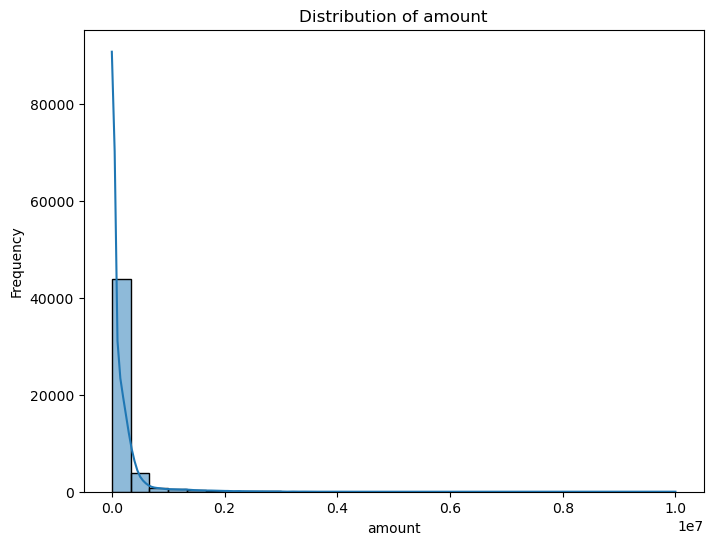

C:\Users\kunta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


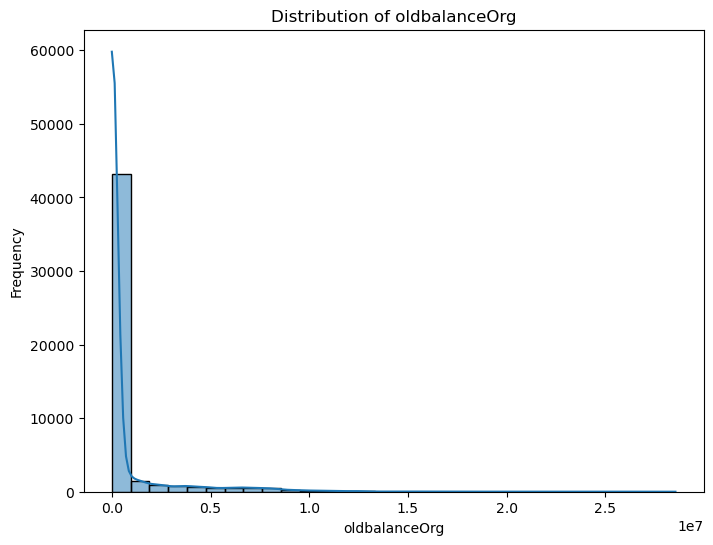

C:\Users\kunta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


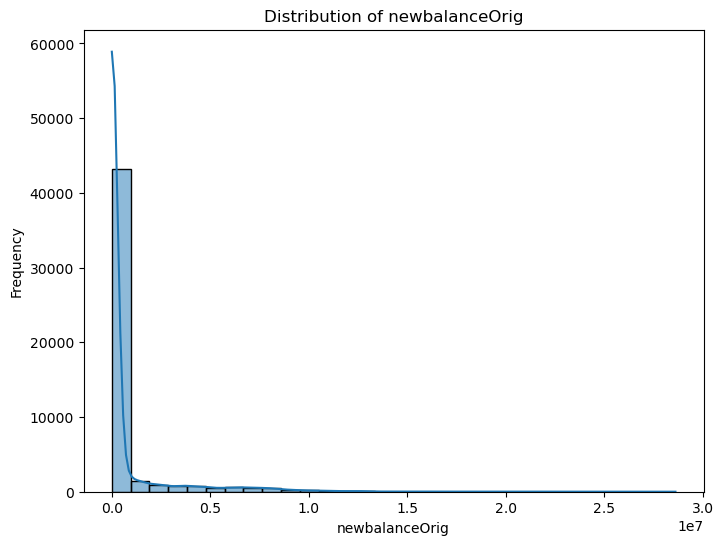

C:\Users\kunta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


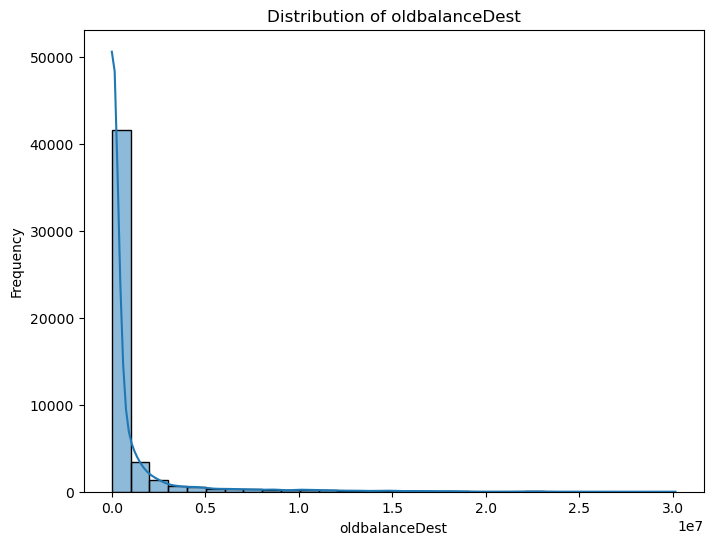

C:\Users\kunta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


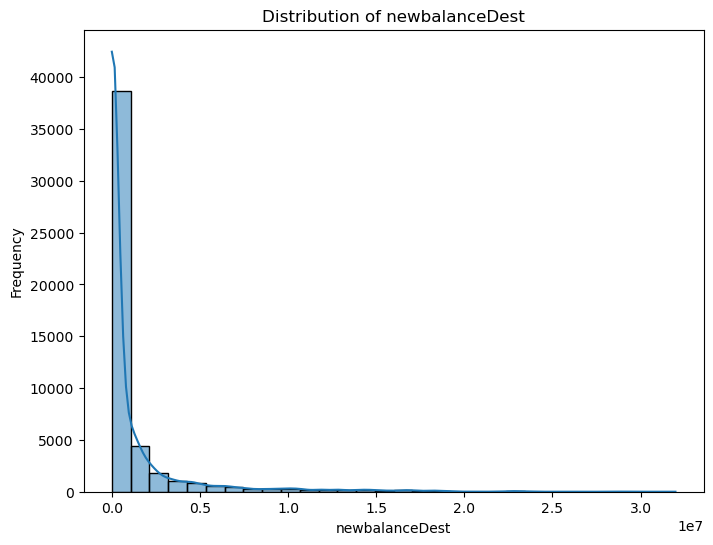

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   step                        49999 non-null  int64  
 1   type                        49999 non-null  object 
 2   amount                      49999 non-null  float64
 3   nameOrig                    49999 non-null  object 
 4   oldbalanceOrg               49999 non-null  float64
 5   newbalanceOrig              49999 non-null  float64
 6   nameDest                    49999 non-null  object 
 7   oldbalanceDest              49999 non-null  float64
 8   newbalanceDest              49999 non-null  float64
 9   isFraud                     49999 non-null  int64  
 10  isFlaggedFraud              49999 non-null  int64  
 11  hour_of_day                 49999 non-null  int64  
 12  day_of_week                 49999 non-null  int64  
 13  transactio

C:\Users\kunta\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\kunta\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\kunta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


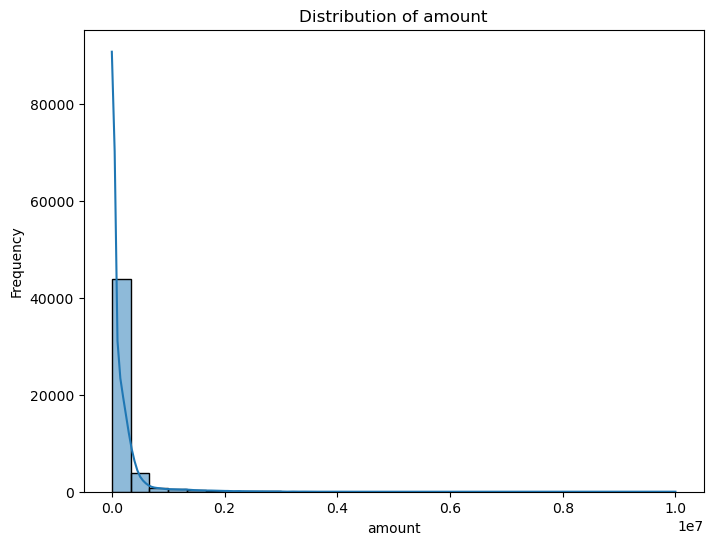

C:\Users\kunta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


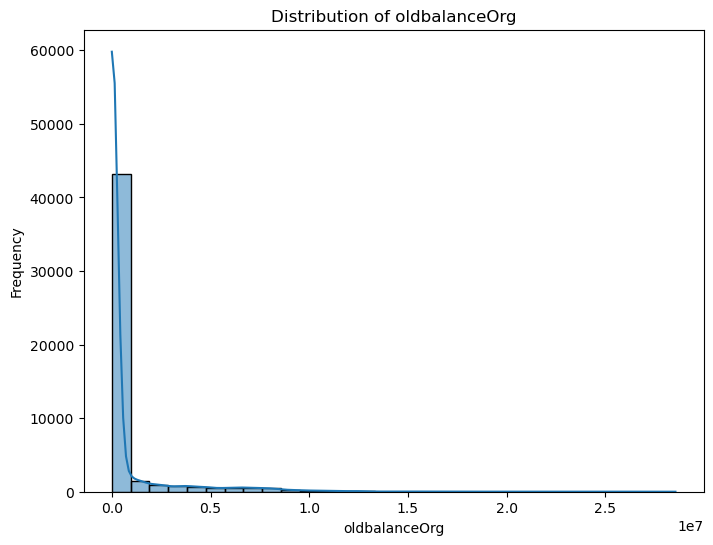

C:\Users\kunta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


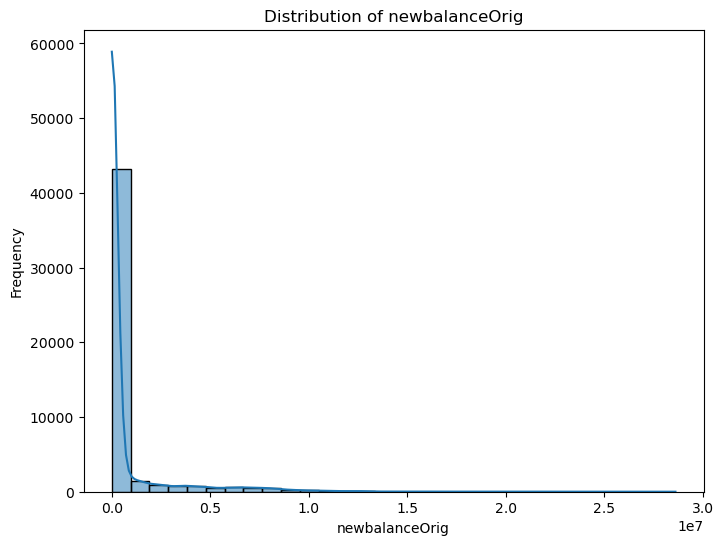

C:\Users\kunta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


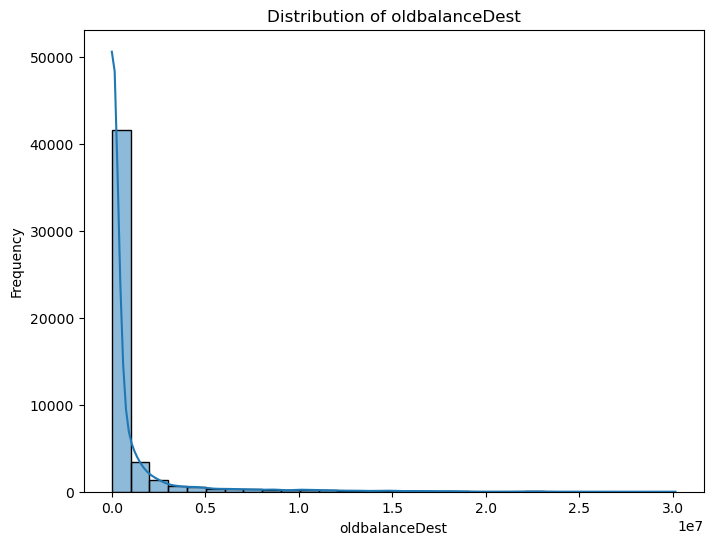

C:\Users\kunta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


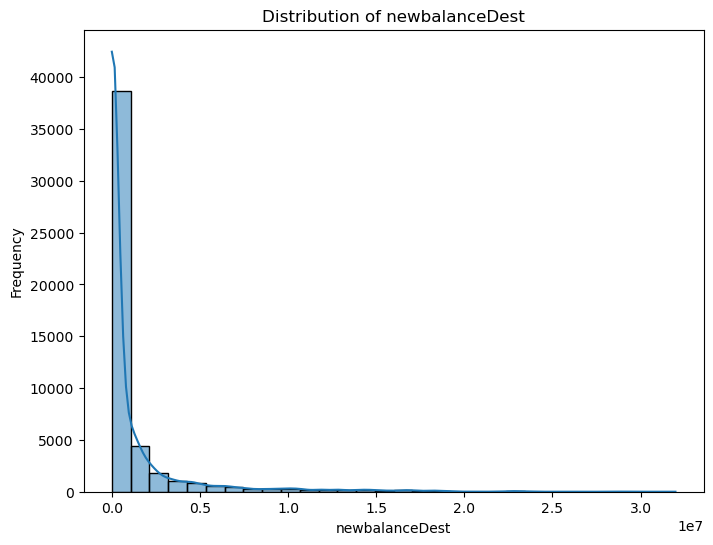

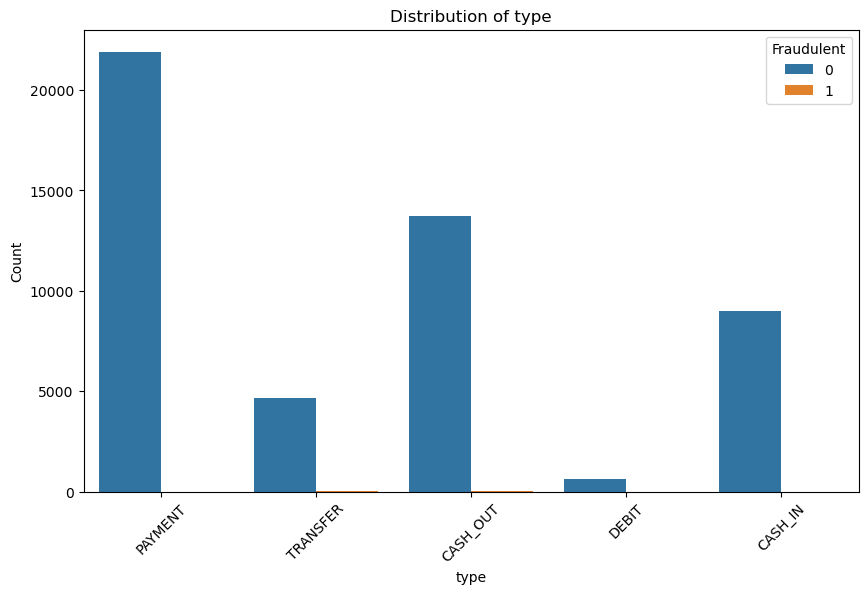

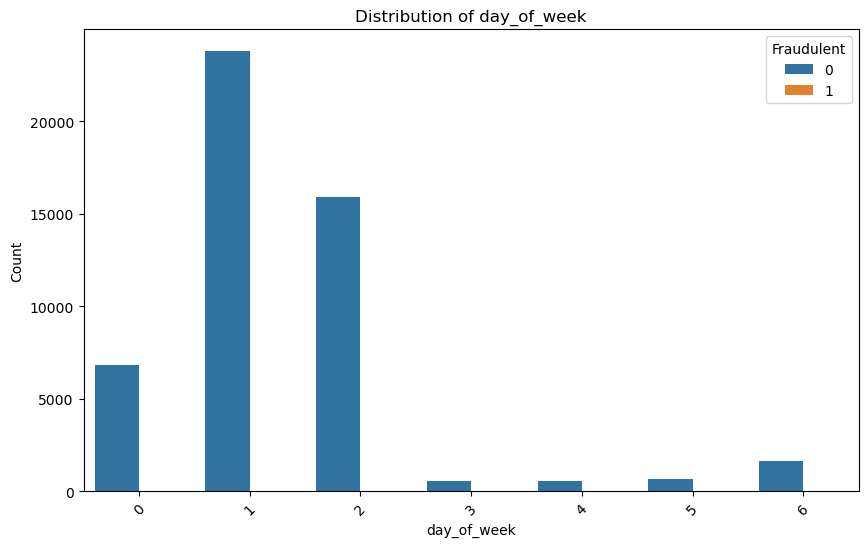

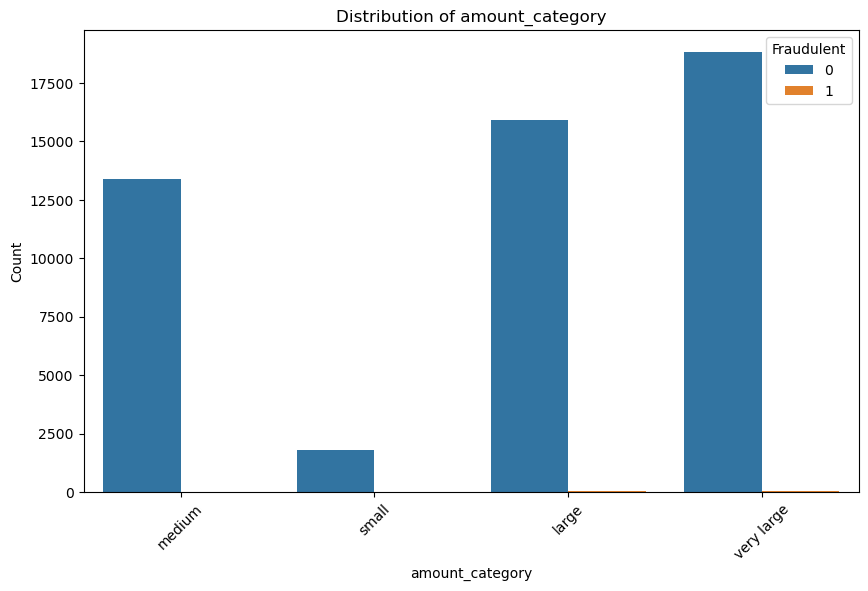

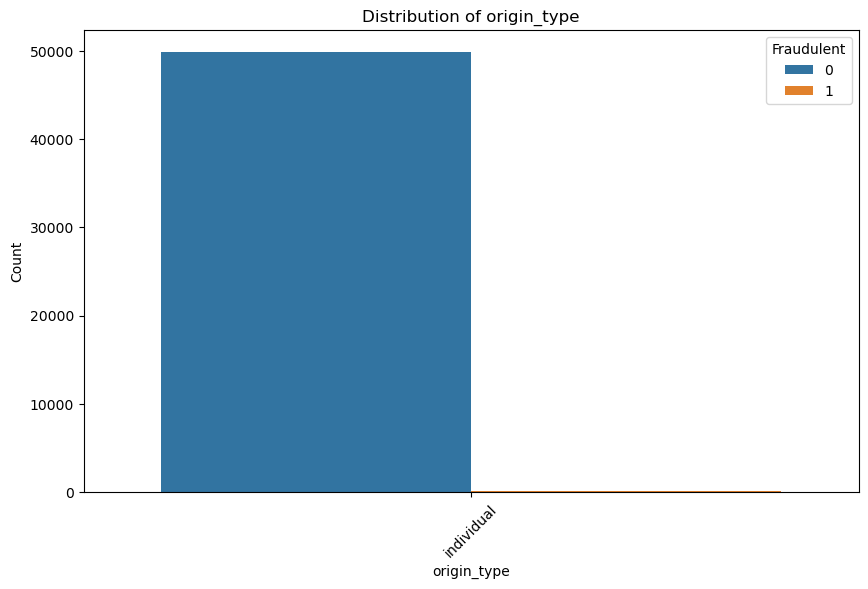

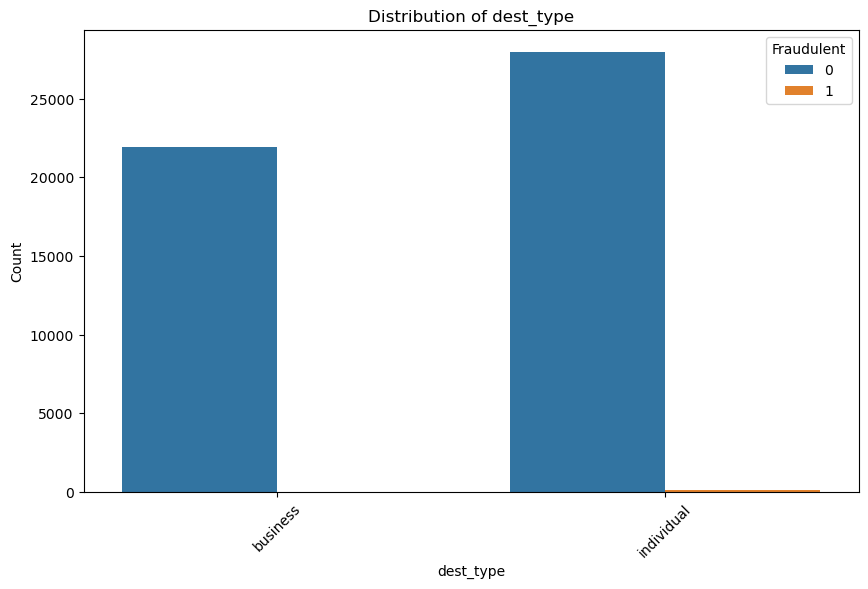

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

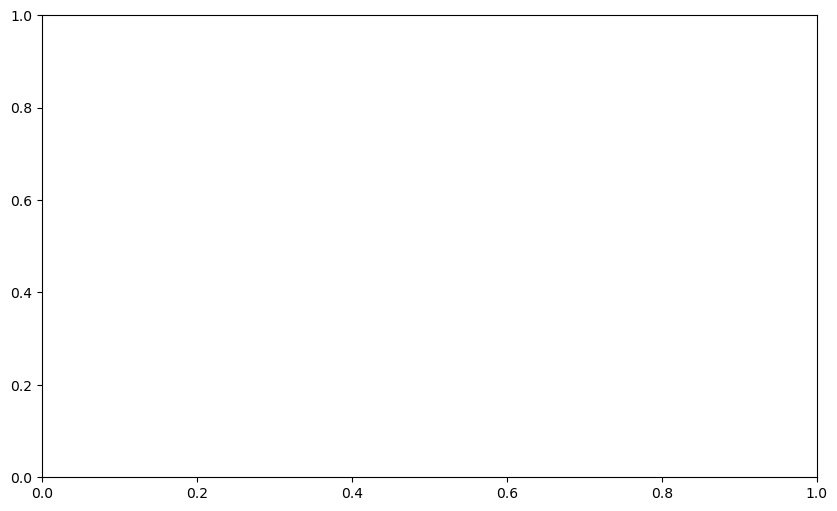

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from Excel file
data = pd.read_excel(r"C:\Users\kunta\Downloads\50K_processed.xlsx")

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(data.describe())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Visualize the distribution of numerical features
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the distribution of categorical features
categorical_features = ['type', 'day_of_week', 'amount_category', 'origin_type', 'dest_type', 'flagged_fraud_reason']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue='isFraud')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Fraudulent')
    plt.show()

# Visualize the correlation matrix between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


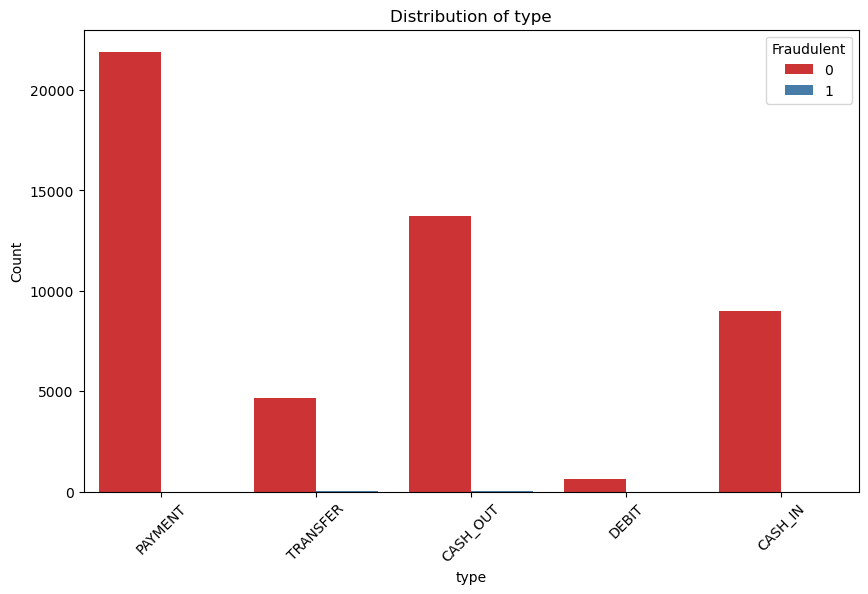

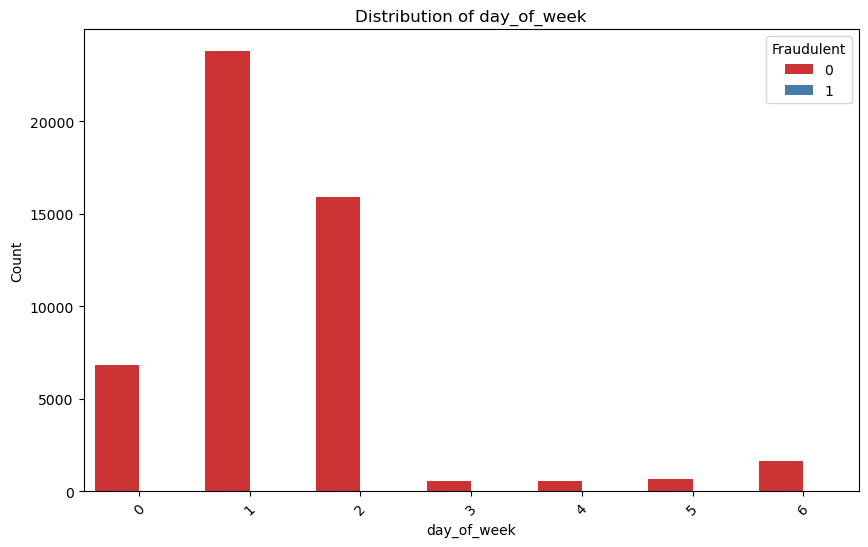

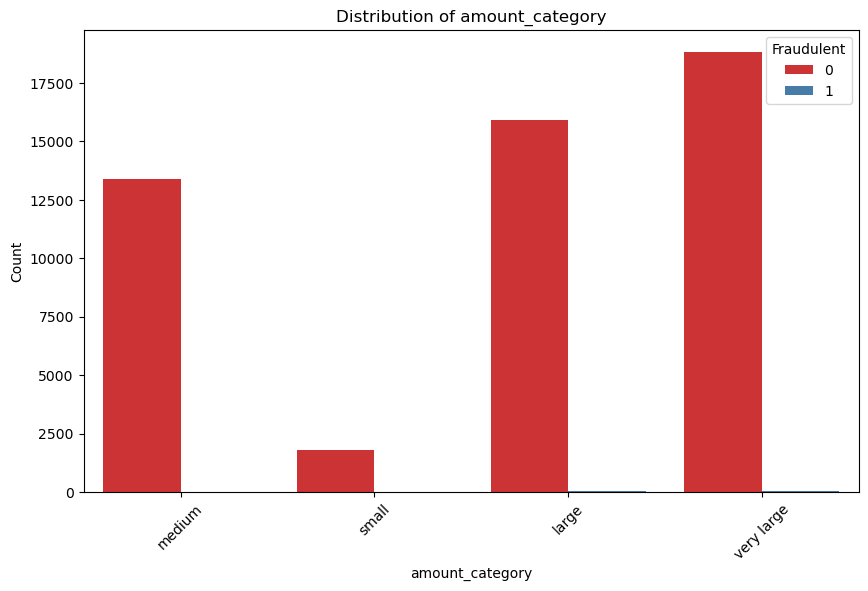

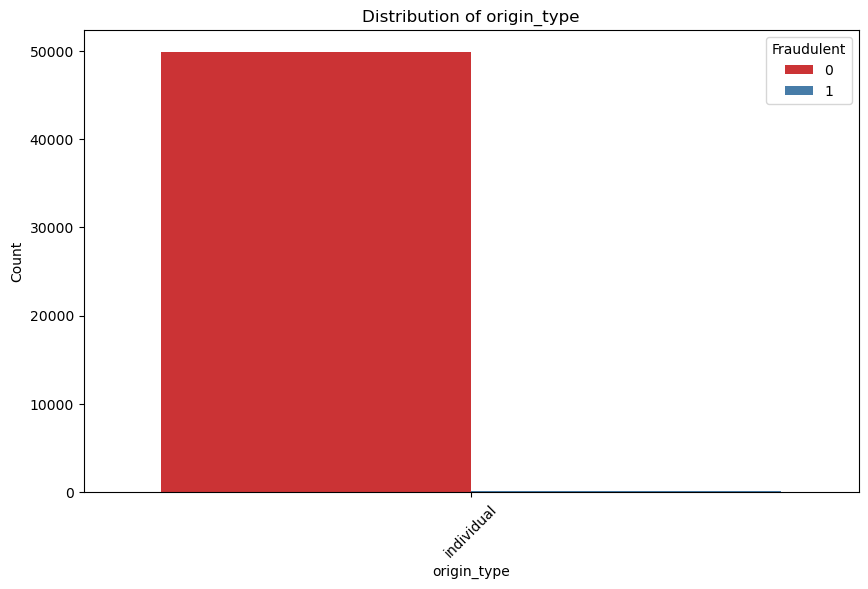

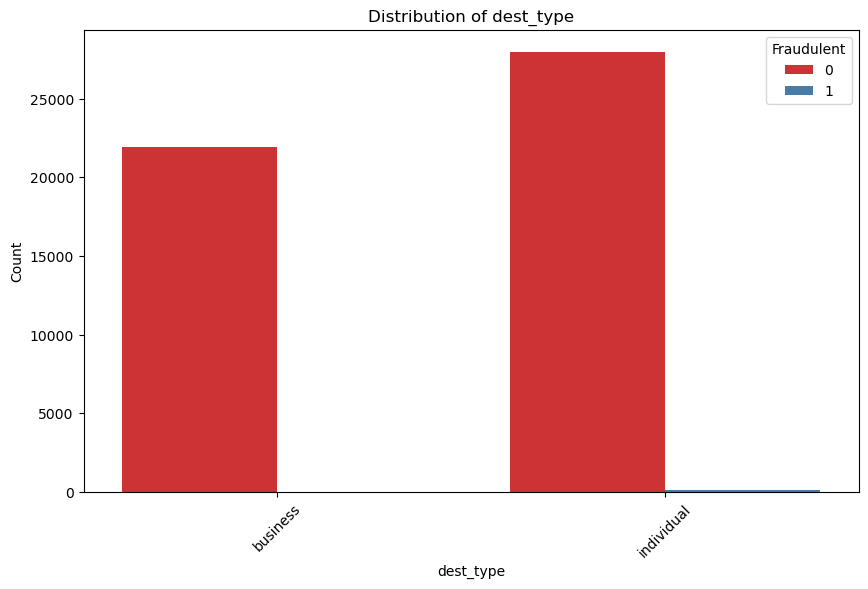

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

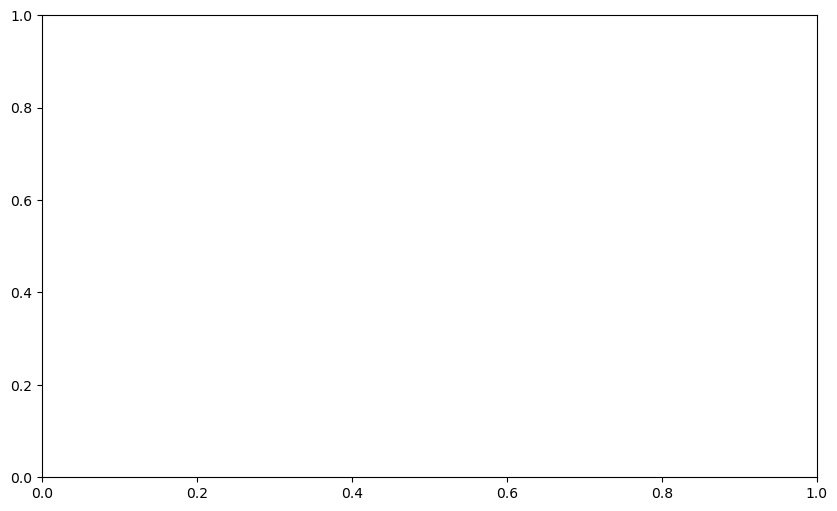

In [12]:
# Visualize the distribution of categorical features
categorical_features = ['type', 'day_of_week', 'amount_category', 'origin_type', 'dest_type', 'flagged_fraud_reason']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=feature, hue='isFraud', palette='Set1')  # Added palette parameter for better visualization
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Fraudulent')
    plt.show()


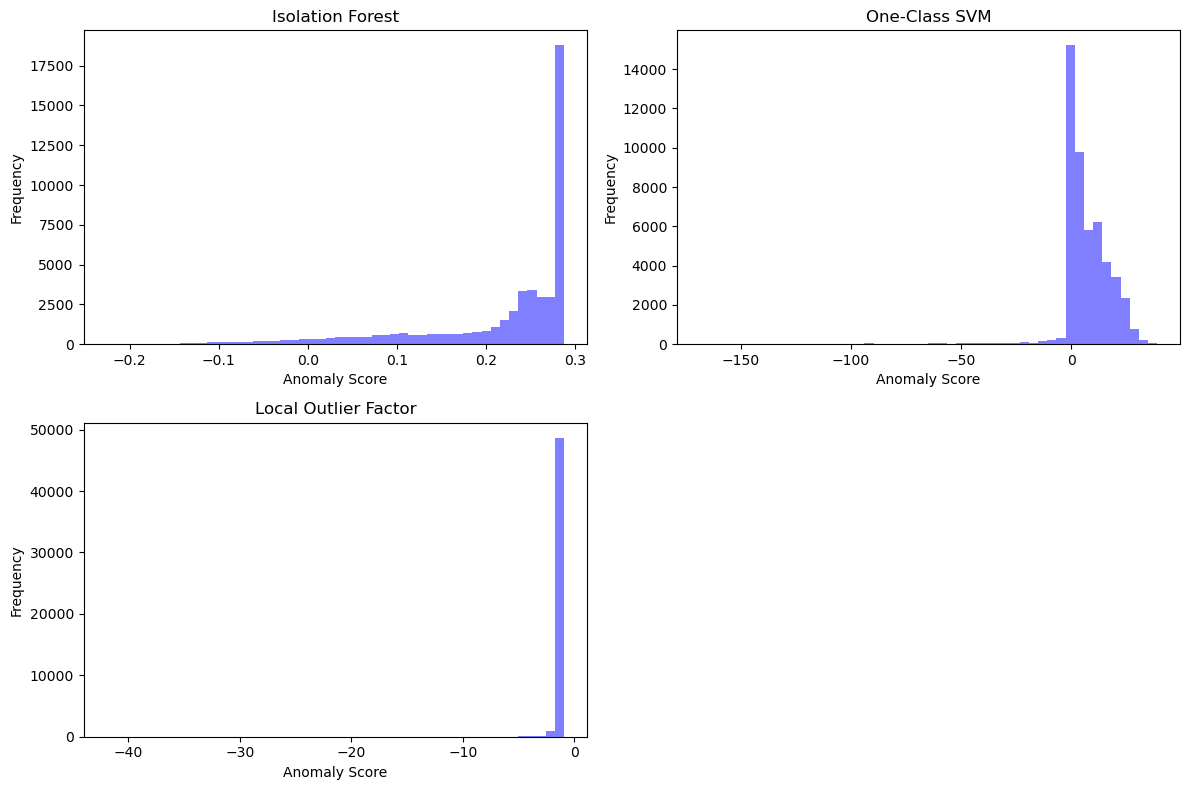

Summary for Isolation Forest:
              step        amount  oldbalanceOrg  newbalanceOrig  \
count  2500.000000  2.500000e+03   2.500000e+03    2.500000e+03   
mean      7.263200  5.809423e+05   5.440721e+06    5.515865e+06   
std       2.064856  8.716283e+05   5.897012e+06    5.971306e+06   
min       1.000000  9.869000e+01   0.000000e+00    0.000000e+00   
25%       7.000000  1.134826e+05   2.136900e+04    0.000000e+00   
50%       8.000000  2.314779e+05   3.913090e+06    4.071757e+06   
75%       8.000000  4.891124e+05   9.418897e+06    9.538257e+06   
max       9.000000  1.000000e+07   2.854724e+07    2.861740e+07   

       oldbalanceDest  newbalanceDest      isFraud  isFlaggedFraud  \
count    2.500000e+03    2.500000e+03  2500.000000          2500.0   
mean     7.511820e+06    8.954793e+06     0.003600             0.0   
std      6.231191e+06    6.807738e+06     0.059904             0.0   
min      0.000000e+00    0.000000e+00     0.000000             0.0   
25%      1.62879

C:\Users\kunta\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\kunta\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\kunta\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\kunta\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\kunta\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

# Step 1: Preprocess the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_features])

# Step 2: Train anomaly detection models
models = {
    "Isolation Forest": IsolationForest(contamination=0.05),
    "One-Class SVM": OneClassSVM(nu=0.05),
    "Local Outlier Factor": LocalOutlierFactor(contamination=0.05)
}

for name, model in models.items():
    model.fit(data_scaled)

# Step 3: Detect anomalies
anomaly_scores = {}
for name, model in models.items():
    if name == "Local Outlier Factor":
        scores = model.negative_outlier_factor_
    else:
        scores = model.decision_function(data_scaled)
    anomaly_scores[name] = scores

# Step 4: Visualize anomalies
plt.figure(figsize=(12, 8))
for i, (name, scores) in enumerate(anomaly_scores.items()):
    plt.subplot(2, 2, i + 1)
    plt.hist(scores, bins=50, color='b', alpha=0.5)
    plt.title(name)
    plt.xlabel('Anomaly Score')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 5: Print summary
for name, scores in anomaly_scores.items():
    outliers = data.iloc[np.where(scores < 0)[0]]
    print(f"Summary for {name}:")
    print(outliers.describe())


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_excel(r"C:\Users\kunta\Downloads\50K.xlsx")

# Define features
features = ['amount', 'oldbalanceDest']

# Split the dataset into training and testing sets
X_train, X_test, _, y_test = train_test_split(data[features], data['isFraud'], test_size=0.2, random_state=42)

# Define models
models = {
    "Isolation Forest": IsolationForest(contamination=0.01),
    "Local Outlier Factor": LocalOutlierFactor(contamination=0.01),
    "One-Class SVM": OneClassSVM(nu=0.01)
}

# Evaluate each model
evaluation_results = {}
for name, model in models.items():
    model.fit(X_train)
    
    # Special handling for Local Outlier Factor
    if name == "Local Outlier Factor":
        anomalies = model.fit_predict(X_test) == -1
    else:
        anomalies = model.predict(X_test) == -1
    
    # Invert the anomalies predictions for easier comparison with true labels
    y_pred = np.where(anomalies, 1, 0)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly'], output_dict=True)
    evaluation_results[name] = {'accuracy': accuracy, 'report': report}

# Print evaluation results
for name, result in evaluation_results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['report'])
    print("\n")


C:\Users\kunta\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Model: Isolation Forest
Accuracy: 0.99
Classification Report:
{'Normal': {'precision': 0.9979836677084384, 'recall': 0.9919831646457561, 'f1-score': 0.9949743692833452, 'support': 9979}, 'Anomaly': {'precision': 0.012345679012345678, 'recall': 0.047619047619047616, 'f1-score': 0.019607843137254898, 'support': 21}, 'accuracy': 0.99, 'macro avg': {'precision': 0.5051646733603921, 'recall': 0.5198011061324018, 'f1-score': 0.5072911062103, 'support': 10000}, 'weighted avg': {'precision': 0.9959138279321765, 'recall': 0.99, 'f1-score': 0.9929260995784384, 'support': 10000}}


Model: Local Outlier Factor
Accuracy: 0.9883
Classification Report:
{'Normal': {'precision': 0.9980808080808081, 'recall': 0.9901793766910512, 'f1-score': 0.9941143920720359, 'support': 9979}, 'Anomaly': {'precision': 0.02, 'recall': 0.09523809523809523, 'f1-score': 0.03305785123966942, 'support': 21}, 'accuracy': 0.9883, 'macro avg': {'precision': 0.5090404040404041, 'recall': 0.5427087359645733, 'f1-score': 0.5135861

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_excel(r"C:\Users\kunta\Downloads\50K.xlsx")

# Define features
features = ['amount', 'oldbalanceDest']

# Split the dataset into training and testing sets
X_train, X_test, _, y_test = train_test_split(data[features], data['isFraud'], test_size=0.2, random_state=42)

# Define models
models = {
    "Isolation Forest": IsolationForest(contamination=0.01),
    "Local Outlier Factor": LocalOutlierFactor(contamination=0.01),
    "One-Class SVM": OneClassSVM(nu=0.01)
}

# Evaluate each model
evaluation_results = {}
for name, model in models.items():
    model.fit(X_train)
    
    # Special handling for Local Outlier Factor
    if name == "Local Outlier Factor":
        anomalies = model.fit_predict(X_test) == -1
    else:
        anomalies = model.predict(X_test) == -1
    
    # Invert the anomalies predictions for easier comparison with true labels
    y_pred = np.where(anomalies, 1, 0)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Normal', 'Anomaly'], output_dict=True)
    evaluation_results[name] = {'accuracy': accuracy, 'report': report}

# Print evaluation results
for name, result in evaluation_results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:")
    print(result['report'])
    print("\n")


C:\Users\kunta\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Model: Isolation Forest
Accuracy: 0.9893
Classification Report:
{'Normal': {'precision': 0.9979822437449556, 'recall': 0.9912816915522598, 'f1-score': 0.9946206827208284, 'support': 9979}, 'Anomaly': {'precision': 0.011363636363636364, 'recall': 0.047619047619047616, 'f1-score': 0.01834862385321101, 'support': 21}, 'accuracy': 0.9893, 'macro avg': {'precision': 0.504672940054296, 'recall': 0.5194503695856537, 'f1-score': 0.5064846532870197, 'support': 10000}, 'weighted avg': {'precision': 0.9959103446694547, 'recall': 0.9893, 'f1-score': 0.9925705113972064, 'support': 10000}}


Model: Local Outlier Factor
Accuracy: 0.9883
Classification Report:
{'Normal': {'precision': 0.9980808080808081, 'recall': 0.9901793766910512, 'f1-score': 0.9941143920720359, 'support': 9979}, 'Anomaly': {'precision': 0.02, 'recall': 0.09523809523809523, 'f1-score': 0.03305785123966942, 'support': 21}, 'accuracy': 0.9883, 'macro avg': {'precision': 0.5090404040404041, 'recall': 0.5427087359645733, 'f1-score': 0.

C:\Users\kunta\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomaly predictions for Isolation Forest: [False False False ... False False False]


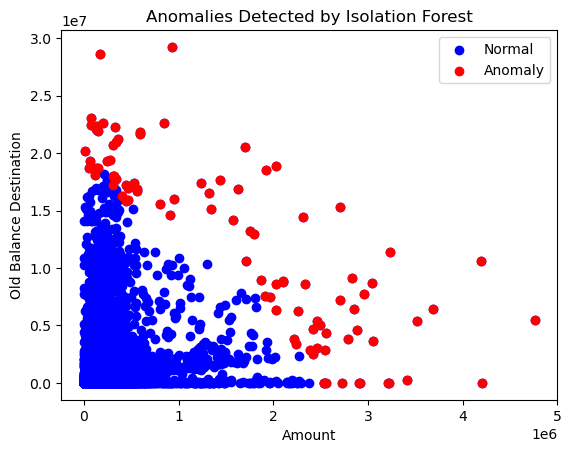

Anomaly predictions for One-Class SVM: [False False False ... False False False]


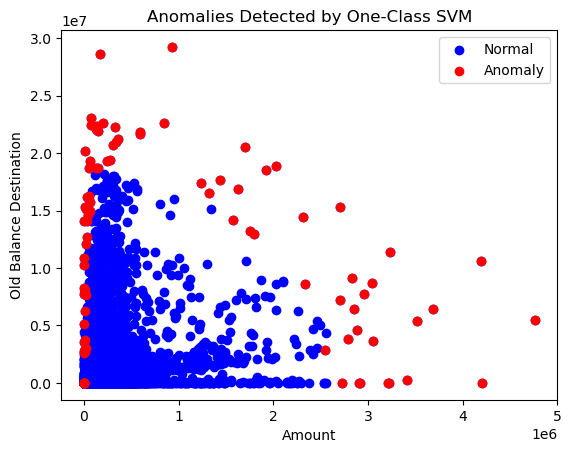

C:\Users\kunta\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Anomaly predictions for Local Outlier Factor: [False False False ... False False False]


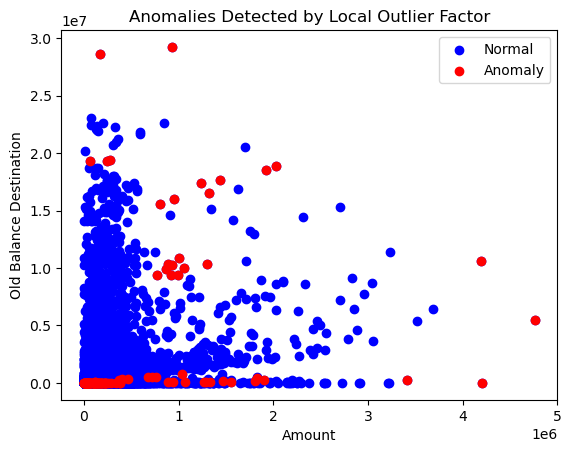

In [20]:
D